In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator



# Loading Dataset & Normalizing




In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
#data normalization
x_train = x_train/255.0
x_test = x_test/255.0

11490434/11490434 [==============================] - 2s 0us/step


# Test data augmantation

In [ ]:

# Define the data generator with the desired transformations
datagen = ImageDataGenerator(
    rotation_range=10,      # Rotate images by up to 10 degrees
    zoom_range=0.1,         # Zoom in or out by up to 10%
    width_shift_range=0.1,  # Shift images horizontally by up to 10%
    height_shift_range=0.1, # Shift images vertically by up to 10%
)

# Fit the data generator to the testing data
datagen.fit(x_test.reshape((-1, 28, 28, 1)))

# Create a new iterator for the augmented data
augmented_iterator = datagen.flow(x_test.reshape((-1, 28, 28, 1)), y_test, batch_size=32)


# **Creating model & Compilation without augmantation**

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#input layer
    keras.layers.Dense(128,activation='relu'),#hidden layer with 128 neurons
    keras.layers.Dense(64,activation='relu'),#hidden layer with 64 neurons
    keras.layers.Dense(32,activation='relu'),#hidden layer with 32 neurons
    keras.layers.Dense(10,activation='softmax')#output layer with 10 neurons
])

model.compile( #model compilation
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)




In [ ]:
model.fit(x_train,y_train,epochs = 20)#model fitting


Epoch 1/20
1875/1875 [==============================] - 12s 3ms/step - loss: 0.2510 - accuracy: 0.9257
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1052 - accuracy: 0.9684
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0732 - accuracy: 0.9770
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0594 - accuracy: 0.9812
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0457 - accuracy: 0.9858
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0391 - accuracy: 0.9873
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0334 - accuracy: 0.9890
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0294 - accuracy: 0.9906
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0260 - accuracy: 0.9915
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.02

# **Model evaluation and Preidtion**


In [ ]:
model.evaluate(x_test,y_test) #model evaluation
model.evaluate(augmented_iterator) #model evaluation

313/313 [==============================] - 4s 11ms/step - loss: 1.9597 - accuracy: 0.7764


[1.9597392082214355, 0.7764000296592712]

313/313 [==============================] - 1s 1ms/step


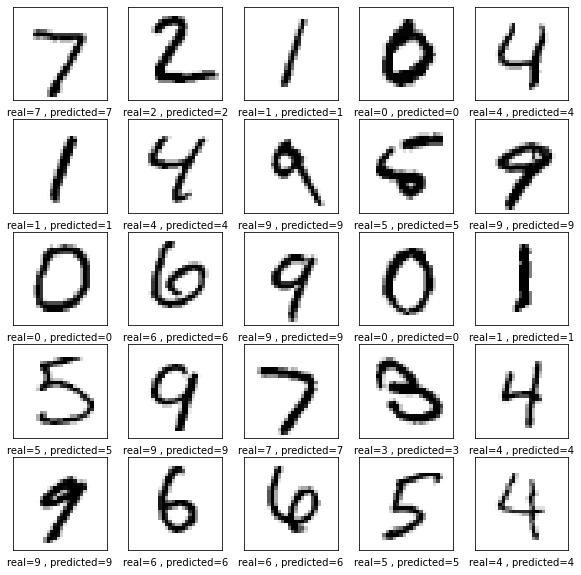

In [ ]:

# predicted = model.predict(x_test)
#showing the data
predicted = model.predict(x_test)
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test[i],cmap=plt.cm.binary)
  plt.xlabel("real="+str(y_test[i])+" , "+"predicted="+str(np.argmax(predicted[i])))
plt.show()


# Data augmentation,creating new dataset



In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,      # Rotate images by up to 10 degrees
    zoom_range=0.1,         # Zoom in or out by up to 10%
    width_shift_range=0.1,  # Shift images horizontally by up to 10%
    height_shift_range=0.1, # Shift images vertically by up to 10%
)

# Fit the data generator to the training data
datagen.fit(x_train.reshape(-1, 28, 28, 1))

# Create a new training set with augmented data
augmented_images = []
augmented_labels = []
for x_batch, y_batch in datagen.flow(x_train.reshape(-1, 28, 28, 1), y_train, batch_size=len(x_train)):
    augmented_images.append(x_batch)
    augmented_labels.append(y_batch)
    if len(augmented_images) >= 10:
        break

augmented_images = tf.concat(augmented_images, axis=0)
augmented_labels = tf.concat(augmented_labels, axis=0)


# **Creating model & Compilation with augmantation**

In [ ]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#input layer
    keras.layers.Dense(128,activation='relu'),#hidden layer with 128 neurons
    keras.layers.Dense(64,activation='relu'),#hidden layer with 64 neurons
    keras.layers.Dense(32,activation='relu'),#hidden layer with 32 neurons
    keras.layers.Dense(10,activation='softmax')#output layer with 10 neurons
])

model2.compile( #model compilation
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


# Model training

In [ ]:
model2.fit(augmented_images,augmented_labels,epochs = 20)

Epoch 1/20
18750/18750 [==============================] - 56s 3ms/step - loss: 0.1827 - accuracy: 0.9436
Epoch 2/20
18750/18750 [==============================] - 54s 3ms/step - loss: 0.0920 - accuracy: 0.9714
Epoch 3/20
18750/18750 [==============================] - 54s 3ms/step - loss: 0.0735 - accuracy: 0.9768
Epoch 4/20
18750/18750 [==============================] - 55s 3ms/step - loss: 0.0633 - accuracy: 0.9802
Epoch 5/20
18750/18750 [==============================] - 54s 3ms/step - loss: 0.0570 - accuracy: 0.9819
Epoch 6/20
18750/18750 [==============================] - 56s 3ms/step - loss: 0.0519 - accuracy: 0.9834
Epoch 7/20
18750/18750 [==============================] - 54s 3ms/step - loss: 0.0478 - accuracy: 0.9848
Epoch 8/20
18750/18750 [==============================] - 54s 3ms/step - loss: 0.0448 - accuracy: 0.9859
Epoch 9/20
18750/18750 [==============================] - 54s 3ms/step - loss: 0.0426 - accuracy: 0.9865
Epoch 10/20
18750/18750 [==============================

# **Model evaluation and Preidtion**



In [ ]:
model2.evaluate(x_test,y_test) #model evaluation
model2.evaluate(augmented_iterator)
# augmented_images.shape
predicted = model2.predict(x_test)

313/313 [==============================] - 1s 1ms/step


# **Showing real and Predicted output**

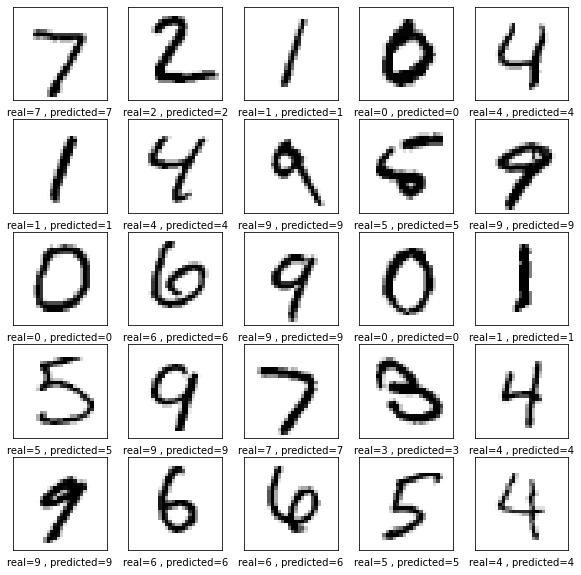

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test[i],cmap=plt.cm.binary)
  plt.xlabel("real="+str(y_test[i])+" , "+"predicted="+str(np.argmax(predicted[i])))
plt.show()
